In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_path = 'nhis_dataset.csv'

In [3]:
df_nhis = pd.read_csv(file_path)

In [4]:
print(list(df_nhis.columns))

['Unnamed: 0', 'YEAR', 'SERIAL', 'NUMPREC', 'STRATA', 'PSU', 'NHISHID', 'HHWEIGHT', 'REGION', 'LIVINGQTR', 'PERNUM', 'NHISPID', 'HHX', 'FMX', 'PX', 'PERWEIGHT', 'SAMPWEIGHT', 'FWEIGHT', 'SUPP1WT', 'INTERVWMO', 'ASTATFLG', 'CSTATFLG', 'AGE', 'SEX', 'SEXORIEN', 'MARSTAT', 'MARST', 'MARSTCOHAB', 'FAMSIZE', 'FAMNUMR', 'FAMKIDNO', 'FAMOLDNO', 'PARENTHERE', 'RELMOM', 'MOMED', 'RELPOP', 'DADED', 'RACEA', 'HISPETH', 'YRSINUS', 'USBORN', 'CITIZEN', 'RACENEW', 'INTERVLANG', 'EDUC', 'HEADSTAREV', 'HEADSTARNOW', 'EMPSTAT', 'HOURSWRK', 'MONTHWRK', 'USUALFT', 'EMPSTATWKYR', 'WORKEV', 'POORYN', 'INCFAM07ON', 'EARNINGS', 'GOTWELF', 'GOTNEWELF', 'GOTSSI', 'GOTSS', 'GOTSSDIS', 'GOTNONSSDIS', 'GOTDIV', 'GOTINT', 'GOTOTHPEN', 'GOTWAGE', 'GOTSEMP', 'GOTCHSUP', 'GOTSTAMPFAM', 'OWNERSHIP', 'LOWRENT', 'HEALTH', 'WORKVOLHCSET', 'WORKVOLHCPAT', 'NBHDTRUST', 'PREGNANTNOW', 'USUALPL', 'TYPPLSICK', 'HIUNABLEPAY', 'HINOTCOVE', 'ANEMIAYR', 'CHOLHIGHYR', 'CRONBRONYR', 'DIARRHEAYR', 'EARINFYR', 'FHEADYR', 'HYPERTENYR'

In [5]:
# Unhealthy columns
# triplet corresponds to (not having condition, having condition, unknown), for each label
default_disease_tuple = (
    [1,], 
    [2,], 
    [0, 7, 8, 9]
)
default_mental_health_tuple = (
    [0], # might include 1 as being "a little of the time"
    [1, 2, 3, 4],
    [6, 7, 8, 9],
)
col_binarisation_issues = {
    'ANEMIAYR': default_disease_tuple, 
    'CHOLHIGHYR': default_disease_tuple, 
    'CRONBRONYR': default_disease_tuple, 
    'DIARRHEAYR': default_disease_tuple,
    'EARINFYR': default_disease_tuple, 
    'FHEADYR': default_disease_tuple, 
    'HYPERTENYR': default_disease_tuple, 
    'LIVERCONYR': default_disease_tuple, 
    'RALLERGYR': default_disease_tuple, 
    'SALLERGYR': default_disease_tuple,
    'SEIZUREYR': default_disease_tuple,
    'ULCERYR': default_disease_tuple, 
    'ALCSTAT1':(
        [1, 2], 
        [3,], 
        [0, 9]
    ),
    'SMOKFREQNOW':(
        [1],
        [2, 3],
        [0, 7, 8, 9],
    ), 
    'EXERDYR': default_disease_tuple, 
    'DIETDYR': default_disease_tuple, 
    'HRSLEEP':( # less than 6 hours is unhealthy and more than 10 hours
        list(range(1, 6)) + list(range(11, 25)),
        list(range(6, 11)),
        [0, 97, 98, 99],
    ), 
    'AEFFORT': default_mental_health_tuple, 
    'AHOPELESS': default_mental_health_tuple, 
    'ANERVOUS': default_mental_health_tuple, 
    'ARESTLESS': default_mental_health_tuple, 
    'ASAD': default_mental_health_tuple, 
    'AWORTHLESS': default_mental_health_tuple, 
    'DEPFREQ':(
        [5,],
        [1, 2, 3, 4],
        [0, 7, 8, 9],
    ), 
    'DEPRX':(
        [1],
        [2],
        [0, 7, 8, 9],
    ), 
    'DEPFEELEVL':(
        [0],
        [1, 2, 3],
        [7, 8, 9],
    ),
}

In [6]:
# Healthy columns
# Triplets are (not having, having, unknown)
col_binarisation_adv = {
    'MOD10FWK': (
        [94, 95],
        list(range(1, 94)),
        [0, 96, 97, 98, 99],    
    ),
    'VIG10FWK': (
        [94, 95, 96],
        list(range(1, 94)),
        [0, 97, 98, 99],
    ),
    'EXERNOW': default_disease_tuple,
    'DIETNOW': default_disease_tuple
}

In [7]:
df_nhis_adult = df_nhis[df_nhis['ASTATFLG'] == 1]

In [8]:
categorical = ['REGION','LIVINGQTR','INTERVWMO','SEX','SEXORIEN','MARSTAT','MARST','MARSTCOHAB',
               'PARENTHERE','RELMOM','MOMED','RELPOP','DADED','RACEA','HISPETH','YRSINUS','USBORN',
               'CITIZEN','RACENEW','INTERVLANG','EDUC','HEADSTAREV','HEADSTARNOW','EMPSTAT',
               'MONTHWRK','USUALFT','EMPSTATWKYR','WORKEV','POORYN','INCFAM07ON','EARNINGS',
               'GOTWELF','GOTNEWELF','GOTSSI','GOTSS','GOTSSDIS','GOTNONSSDIS','GOTDIV','GOTINT',
               'GOTOTHPEN','GOTWAGE','GOTSEMP','GOTCHSUP','GOTSTAMPFAM','OWNERSHIP','LOWRENT',
               'HEALTH','WORKVOLHCSET','WORKVOLHCPAT','NBHDTRUST','PREGNANTNOW','USUALPL','TYPPLSICK',
               'HIUNABLEPAY','HINOTCOVE','ANEMIAYR','CHOLHIGHYR','CRONBRONYR','DIARRHEAYR','EARINFYR',
               'FHEADYR','HYPERTENYR','LIVERCONYR','RALLERGYR','SALLERGYR','SEIZUREYR','ULCERYR',
               'ALCSTAT1','SMOKFREQNOW','CSQTRYYR','MOD10FWK','VIG10FWK','EXERDYR','EXERNOW','DIETDYR',
               'DIETNOW','LANY']

numerical = ['AGE','FAMSIZE','FAMKIDNO','FAMOLDNO','HOURSWRK','HRSLEEP']

missing_map = {'REGION': (8,9),
               'LIVINGQTR': (98,),
               'INTERVWMO': (98,),
               'AGE': (99,),
               'SEXORIEN': (0,8),
               'MARSTAT': (0,99),
               'MARST': (0,99),
               'MARSTCOHAB': (9,),
               'FAMSIZE': (0,99),
               'PARENTHERE': (0,98,99),
               'RELMOM': (0,60,97,98,99),
               'MOMED': (0,97,98,99),
               'RELPOP': (0,60,97,98,99),
               'DADED': (0,97,98,99),
               'RACEA': (900,970,980,990),
               'HISPETH': (90,91,92,93,99),
               'YRSINUS': (0,7,8,9),
               'USBORN': (96,97,98,99),
               'CITIZEN': (7,8,9),
               'RACENEW': (97,98,99),
               'INTERVLANG': (8,9),
               'EDUC': (0,997,998,999),
               'HEADSTAREV': (0,7,8,9),
               'HEADSTARNOW': (0,7,8,9),
               'EMPSTAT': (0,90,97,98,99),
               'HOURSWRK': (0,97,98,99),
               'MONTHWRK': (13,90,97,98,99),
               'USUALFT': (0,7,8,9),
               'EMPSTATWKYR': (0,7,8,9),
               'WORKEV': (0,7,8,9),
               'POORYN': (9,),
               'INCFAM07ON': (96,99),
               'EARNINGS': (0,97,98,99),
               'GOTWELF': (0,70,80,90),
               'GOTNEWELF': (0,7,8,9),
               'GOTSSI': (0,70,80,90),
               'GOTSS': (0,70,80,90),
               'GOTSSDIS': (0,97,98,99),
               'GOTNONSSDIS': (0,70,80,90),
               'GOTDIV': (0,70,80,90),
               'GOTINT': (0,70,80,90),
               'GOTOTHPEN': (0,7,8,9),
               'GOTWAGE': (0,7,8,9),
               'GOTSEMP': (0,7,8,9),
               'GOTCHSUP': (7,8,9),
               'GOTSTAMPFAM': (0,70,80,90),
               'OWNERSHIP': (0,97,98,99),
               'LOWRENT': (0,7,8,9),
               'HEALTH': (0,7,8,9),
               'WORKVOLHCSET': (0,7,8,9),
               'WORKVOLHCPAT': (0,7,8,9),
               'NBHDTRUST': (0,7,8,9),
               'PREGNANTNOW': (0,7,8,9),
               'USUALPL': (0,7,8,9),
               'TYPPLSICK': (0,97,98,99),
               'HIUNABLEPAY': (0,7,8,9),
               'HINOTCOVE': (0,7,8,9),
               'ANEMIAYR': (0,7,8,9),
               'CHOLHIGHYR': (0,7,8,9),
               'CRONBRONYR': (0,7,8,9),
               'DIARRHEAYR': (0,7,8,9),
               'EARINFYR': (0,7,8,9),
               'FHEADYR': (0,7,8,9),
               'HYPERTENYR': (0,7,8,9),
               'LIVERCONYR': (0,7,8,9),
               'RALLERGYR': (0,7,8,9),
               'SALLERGYR': (0,7,8,9),
               'SEIZUREYR': (0,7,8,9),
               'ULCERYR': (0,7,8,9),
               'ALCSTAT1': (0,9),
               'SMOKFREQNOW': (0,7,8,9),
               'CSQTRYYR': (0,7,8,9),
               'MOD10FWK': (0,97,98,99),
               'VIG10FWK': (0,97,98,99),
               'EXERDYR': (0,7,8,9),
               'EXERNOW': (0,7,8,9),
               'DIETDYR': (0,7,8,9),
               'DIETNOW': (0,7,8,9),
               'HRSLEEP': (0,25,97,98,99),
               'LANY': (20,22)}

In [9]:
def not_missing_value(value, missing_list):
    return not value in missing_list

features_completely_unknown = list()

for feature in categorical + numerical:
    if feature in missing_map:
        s_is_value_unknown = df_nhis_adult[feature].apply(not_missing_value, args=(missing_map[feature],))
        if not bool(sum(s_is_value_unknown)):
            features_completely_unknown.append(feature)
            
print(features_completely_unknown)
df_nhis_adult.drop(columns=features_completely_unknown, inplace=True)

['MOMED', 'DADED', 'HEADSTAREV', 'HEADSTARNOW', 'ANEMIAYR', 'DIARRHEAYR', 'EARINFYR', 'FHEADYR', 'RALLERGYR', 'SALLERGYR', 'SEIZUREYR']


/home/zaccharie/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
# binarising health issues and advantages
def binarisation_func(value, binary_tuple):
    if int(value) in binary_tuple[0]:
        return 0
    elif int(value) in binary_tuple[1]:
        return 1
    elif int(value) in binary_tuple[2]:
        return np.nan
    else:
        raise ValueError(f'Value {value} not in binary tuple')

for issue_name, binary_tuple in col_binarisation_issues.items():
    issue_name_bin = f'{issue_name}_bin'
    try:
        df_nhis_adult[issue_name_bin] = df_nhis_adult[issue_name].apply(binarisation_func, args=(binary_tuple, ))
    except KeyError:
        continue
    
for issue_name, binary_tuple in col_binarisation_adv.items():
    issue_name_bin = f'{issue_name}_bin'
    try:
        df_nhis_adult[issue_name_bin] = df_nhis_adult[issue_name].apply(binarisation_func, args=(binary_tuple, ))
    except KeyError:
        continue

    
df_nhis_adult.head()

/home/zaccharie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/zaccharie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,YEAR,SERIAL,NUMPREC,STRATA,PSU,NHISHID,HHWEIGHT,REGION,LIVINGQTR,...,ARESTLESS_bin,ASAD_bin,AWORTHLESS_bin,DEPFREQ_bin,DEPRX_bin,DEPFEELEVL_bin,MOD10FWK_bin,VIG10FWK_bin,EXERNOW_bin,DIETNOW_bin
0,0,2017.0,2.0,1,7126.0,3.0,2017000003,4177.0,3,21,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,3,2017.0,7.0,1,7117.0,49.0,2017000009,2752.0,2,21,...,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
5,5,2017.0,8.0,4,7117.0,37.0,2017000011,4040.0,2,33,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
8,8,2017.0,10.0,1,7118.0,16.0,2017000015,5180.0,2,21,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
9,9,2017.0,11.0,5,7120.0,8.0,2017000018,2739.0,3,21,...,1.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0


In [11]:
# Grouping diseases and mental health issues
diseases = [
    'ANEMIAYR_bin', 
    'CHOLHIGHYR_bin', 
    'CRONBRONYR_bin', 
    'DIARRHEAYR_bin',
    'EARINFYR_bin', 
    'FHEADYR_bin', 
    'HYPERTENYR_bin', 
    'LIVERCONYR_bin', 
    'RALLERGYR_bin', 
    'SALLERGYR_bin',
    'SEIZUREYR_bin',
    'ULCERYR_bin', 
    'ALCSTAT1_bin',
    'SMOKFREQNOW_bin',
    'EXERDYR_bin', 
    'DIETDYR_bin', 
    'HRSLEEP_bin',
    ]

mental_health_issues = [
    'AEFFORT_bin', 
    'AHOPELESS_bin', 
    'ANERVOUS_bin', 
    'ARESTLESS_bin', 
    'ASAD_bin', 
    'AWORTHLESS_bin', 
    'DEPFREQ_bin', 
    'DEPRX_bin', 
    'DEPFEELEVL_bin',
]

def group_fields(df_row, fields):
    fields_in_df = [field for field in fields if field in df_row]
#     import pdb; pdb.set_trace()
    return int(1.0 in df_row.loc[fields_in_df].values)

# df_nhis_adult.loc[:, 'is_sick'] = df_nhis_adult.apply(group_fields, args=(diseases, ), axis=1)
df_nhis_adult.loc[:, 'is_mentally_ill'] = df_nhis_adult.apply(group_fields, args=(mental_health_issues, ), axis=1)

/home/zaccharie/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/zaccharie/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
corr = df_nhis_adult.corr()

<IPython.core.display.Javascript object>


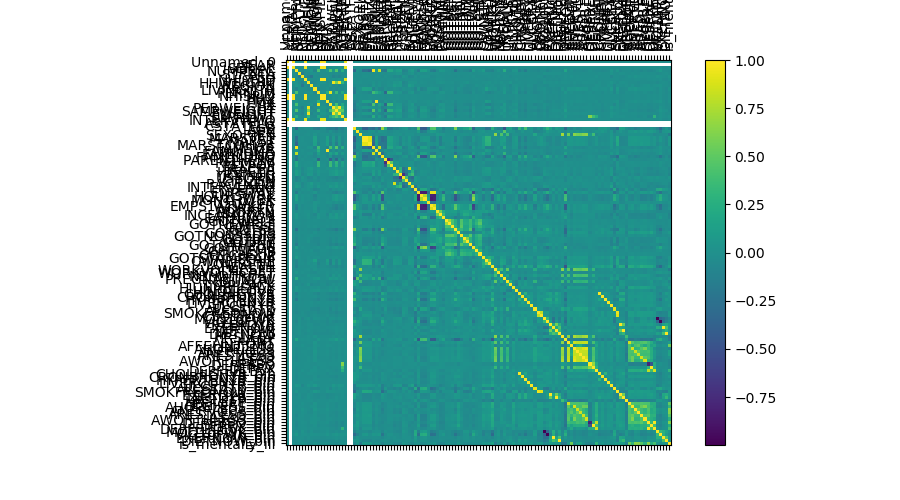

In [14]:
fig, axs = plt.subplots(figsize=(9, 5))
mats = axs.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
fig.colorbar(mats, ax=axs)

In [15]:
cor_thresh = 0.95
clusters = dict()
var_in_a_cluster = set()
for i in corr:
    if i in var_in_a_cluster:
        continue
    var_cor_w_i = list(corr[i][abs(corr[i]) > cor_thresh].index)
    if len(var_cor_w_i) > 1:
        clusters[i] = var_cor_w_i
        var_in_a_cluster.add(i)
        var_in_a_cluster.update(var_cor_w_i)
        
print(clusters)

{'Unnamed: 0': ['Unnamed: 0', 'SERIAL', 'NHISHID', 'NHISPID', 'HHX'], 'NUMPREC': ['NUMPREC', 'FAMSIZE'], 'HHWEIGHT': ['HHWEIGHT', 'PERWEIGHT', 'FWEIGHT'], 'FMX': ['FMX', 'FAMNUMR'], 'MARSTAT': ['MARSTAT', 'MARST'], 'EMPSTAT': ['EMPSTAT', 'WORKEV'], 'CHOLHIGHYR': ['CHOLHIGHYR', 'CHOLHIGHYR_bin'], 'CRONBRONYR': ['CRONBRONYR', 'CRONBRONYR_bin'], 'HYPERTENYR': ['HYPERTENYR', 'HYPERTENYR_bin'], 'LIVERCONYR': ['LIVERCONYR', 'LIVERCONYR_bin'], 'ULCERYR': ['ULCERYR', 'ULCERYR_bin'], 'SMOKFREQNOW': ['SMOKFREQNOW', 'SMOKFREQNOW_bin'], 'MOD10FWK': ['MOD10FWK', 'MOD10FWK_bin'], 'VIG10FWK': ['VIG10FWK', 'VIG10FWK_bin'], 'EXERDYR': ['EXERDYR', 'EXERDYR_bin'], 'EXERNOW': ['EXERNOW', 'EXERNOW_bin'], 'DIETDYR': ['DIETDYR', 'DIETDYR_bin'], 'DIETNOW': ['DIETNOW', 'DIETNOW_bin'], 'DEPRX': ['DEPRX', 'DEPRX_bin'], 'DEPFREQ_bin': ['DEPFREQ_bin', 'DEPFEELEVL_bin']}


`Unnamed: 0`: Identifier
`NUMPREC`: number of person in family / number of respondants in household
`HHWEIGHT`: family / household weight
`PERNUM`: person number in family (i.e. 1 for parent A, 2 for parent B, etc ...)
`PERWEIGHT`: person / family weight
`MARSTAT`: Current / legal marital status
`ANEMIAYR`: 

In [18]:
features_to_drop = ['Unnamed: 0', 'SERIAL', 'NHISHID', 'NHISPID', 'HHX'] + \
    ['NUMPREC', 'FAMSIZE'] + \
    ['HHWEIGHT', 'PERWEIGHT', 'FWEIGHT', 'SAMPWEIGHT', 'SUPP1WT'] + \
    ['FMX', 'FAMNUMR'] + \
    ['ASTATFLG','CSTATFLG'] + \
    ['MARSTAT'] + \
    ['LANY'] + \
    list(col_binarisation_issues.keys()) + \
    list(col_binarisation_adv.keys()) + \
    mental_health_issues

In [19]:
df_nhis_adult_best = df_nhis_adult.drop(columns=features_to_drop, inplace=False, errors='ignore')

In [21]:
df_nhis_adult_best['is_mentally_ill'].value_counts()

1    15668
0    11074
Name: is_mentally_ill, dtype: int64

# Prediction part

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression(penalty='l1', C=1.0, n_jobs=-1)

In [25]:
df_nhis_adult_best_no_nan = df_nhis_adult_best.dropna()

In [26]:
clf.fit(df_nhis_adult_best_no_nan.drop(columns=['is_mentally_ill']), df_nhis_adult_best_no_nan['is_mentally_ill'])

/home/zaccharie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zaccharie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/zaccharie/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
clf.score(df_nhis_adult_best_no_nan.drop(columns=['is_mentally_ill']), df_nhis_adult_best_no_nan['is_mentally_ill'])

0.9555555555555556